<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity-Importing_Data_And_Plots_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing data from a file

You'll often want to write a program to analyze data from some sort of external source.  While you could in theory type all of that data into a python program, it would clearly become tedious very quickly.  A much better solution is to read the data directly from an external file.  Python supports a wide range of ways to do this, and how you import data will depend on the format of that data and what you want to use it for.

One of the most common way data is stored is in a text file. These files are also the simplest to work with since you can open them up in a wide variety of packages to just look at them.  

Since we're going to be working with NumPy a fair amount, it makes sense to use the NumPy functions for reading data.  There are a few of these, here we will use the "loadtxt" function.

Run the following to see the loadtxt's documentation:

In [1]:
import numpy as np
help(np.loadtxt)

Help on function loadtxt in module numpy:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None)
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
        The char

Note that for an argument loadtxt requires a filename (which makes sense since it needs to know what to load).  If you were working on your local computer you could just put in the file name that you want to load.  Fortunately, this will also work with URL's, so we can load a file on the web like this:

In [2]:
data=np.loadtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/test_data.csv')

Click on the url for the file so that you can see the raw file and you know what it looks like.

**Activity** Note that above we've saved the data from our "test_data.csv" file to the NumPy array "data".  To get a feel for what this command is doing, do the following:

* Print out the shape of the data array.  Is it what you expected from looking at the raw data?
* Use the correct array indices to print only the first column.
* Use the correct array indices to print only the portion of the data array that has values from 48.0-51.75 (including 48.25, 48.5, etc)

In [3]:
print(np.shape(data))
print(data[:,0])
print(data[48:52,:])

(100, 4)
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
[[48.   48.25 48.5  48.75]
 [49.   49.25 49.5  49.75]
 [50.   50.25 50.5  50.75]
 [51.   51.25 51.5  51.75]]


There are a few interesting ways to modify the behavior of genfromtxt. First, you might ask how does the function know to put each of these values into a different element in an array? Note the optional argument for "delimiter" which says:

```
 delimiter : str, optional
        The string used to separate values. For backwards compatibility, byte
        strings will be decoded as 'latin1'. The default is whitespace.
```

Sometimes you might have files with datapoints separated  by different values.  For example, comma separated data files are quite popular.  

You might also want to read only certain columns of data.  For that, the usecols argument is helpful, which says:

```
usecols : int or sequence, optional
        Which columns to read, with 0 being the first. For example,
        ``usecols = (1,4,5)`` will extract the 2nd, 5th and 6th columns.
        The default, None, results in all columns being read.
```

Finally, you may have noticed that we are putting this data into a 2D array.  In some instances, you'd rather have each column of data stored as a separate array.   For this, we use the unpack argument:

```
    unpack : bool, optional
        If True, the returned array is transposed, so that arguments may be
        unpacked using ``x, y, z = loadtxt(...)``.  When used with a structured
        data-type, arrays are returned for each field.  Default is False.
```

**Activity** 
* Use the genfromtxt command to try loading the following file:
https://raw.githubusercontent.com/WereszczynskiClasses/data/main/test_data_comma.csv

  Print out the array.  Do you get what you'd expect?
* Modify the genfromtxt command to read the comma separated text file.  Check to make sure you get the correct result.
* Modify the genfromtxt command to read only the first column of data.  Check to make sure you get the correct result.
* Finally, modify the genfromtxt command so that you save each column of data to a different array, which you can call A, B, C, and D.

In [4]:
data=np.genfromtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/test_data_comma.csv')
print(data)
data=np.genfromtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/test_data_comma.csv',delimiter=',')
print(data)
data=np.genfromtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/test_data_comma.csv',delimiter=',',usecols=0)
print(data)
A, B, C, D=np.genfromtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/test_data_comma.csv',delimiter=',',unpack=True)
print("A=",A)
print("B=",B)
print("C=",C)
print("D=",D)

[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
[[ 0.    0.25  0.5   0.75]
 [ 1.    1.25  1.5   1.75]
 [ 2.    2.25  2.5   2.75]
 [ 3.    3.25  3.5   3.75]
 [ 4.    4.25  4.5   4.75]
 [ 5.    5.25  5.5   5.75]
 [ 6.    6.25  6.5   6.75]
 [ 7.    7.25  7.5   7.75]
 [ 8.    8.25  8.5   8.75]
 [ 9.    9.25  9.5   9.75]
 [10.   10.25 10.5  10.75]
 [11.   11.25 11.5  11.75]
 [12.   12.25 12.5  12.75]
 [13.   13.25 13.5  13.75]
 [14.   14.25 14.5  14.75]
 [15.   15.25 15.5  15.75]
 [16.   16.25 16.5  16.75]
 [17.   17.25 17.5  17.75]
 [18.   18.25 18.5  18.75]
 [19.   19.25 19.5  19.75]
 [20.   20.25 20.5  20.75]
 [21.   21.25 21.5  21.75]

# Plotting data

One of the most important aspects of science is communicating your results.  Even if you do all the calculations correctly, if no one can understand what you did then it won't help anyone else (or you!).  One of the primary ways we represent our data is by plotting it.  There are a wide range of plotting methods, but here we'll deal with two of the most common: line plots and scatter plots.

One of the most common ways to make plots in python is with the Matplotlib library.  If used correctly, matplotlib can produce beautiful/publication quality graphics.  For example, you should look at the examples on the matplotlib website to get an idea about teh functionality in matplotlib:  [Examples](https://matplotlib.org/gallery/index.html)

Matplotlib is a library that contains a collection of modules.  The most important one for us is pyplot, which we import as:

In [5]:
import matplotlib.pyplot as plt

Just like with numpy, we can now access all of the pyplot functions by typing plt.XXX (where XXX is the function).

## Line plots



In [6]:
import matplotlib.pyplot as plt

For basic plots, we can use the plot command.  First, have a look at the plot documentation:

In [7]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

There's a lot there! But the most basic requirement is that you input something for the y-values to plot.  If you do that, it will assume the corresponding x-values are integers starting at 0 and increasing by 1 each time, which may not be what you want.  Let's take a look at a simple example:

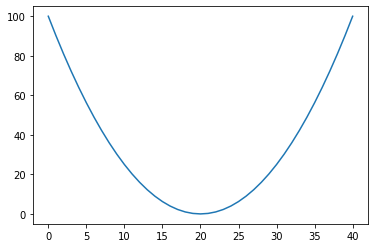

In [8]:
import numpy as np

x = np.arange(-10.0,10.1,.5) #define some x-values
y = x**2.0   #set y = x^2 for each x value
plt.plot(y) #plot the y-values
plt.show()

Here we've tried to plot $x=y^2$. It has the correct shape, but the x-values are off because we didn't tell the plot function what we wanted for x.  To fix that, try these commands. 

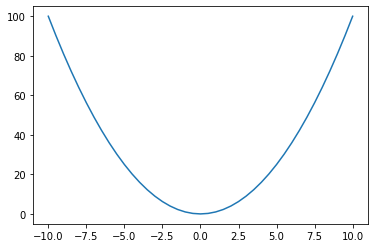

In [9]:
plt.plot(x,y)
plt.show()

That looks better! Also note that we have to execute the plt.show() function to show the plot.  It has no arguments, but don't forget to include the parentheses.  This might seem odd, but the idea is that you can issue a bunch of different commands to modify your plot, and when you're done you want to display it.  We'll see how this works in a minute.

Now perhaps you aren't a fan of using blue lines to show your data.  You can modify the representation by changing the style of the line, making the line into points, or changing the colors you are using.  Note this part of the documentation:



    character        description  
    =============    ===============================
    ``'.'``          point marker
    ``','``          pixel marker
    ``'o'``          circle marker
    ``'v'``          triangle_down marker
    ``'^'``          triangle_up marker
    ``'<'``          triangle_left marker
    ``'>'``          triangle_right marker
    ``'1'``          tri_down marker
    ``'2'``          tri_up marker
    ``'3'``          tri_left marker
    ``'4'``          tri_right marker
    ``'s'``          square marker
    ``'p'``          pentagon marker
    ``'*'``          star marker
    ``'h'``          hexagon1 marker
    ``'H'``          hexagon2 marker
    ``'+'``          plus marker
    ``'x'``          x marker
    ``'D'``          diamond marker
    ``'d'``          thin_diamond marker
    ``'|'``          vline marker
    ``'_'``          hline marker
    =============    ===============================
    
    **Line Styles**
    
    =============    ===============================
    character        description
    =============    ===============================
    ``'-'``          solid line style
    ``'--'``         dashed line style
    ``'-.'``         dash-dot line style
    ``':'``          dotted line style
    =============    ===============================

This is giving you all the different options for displaying your data points as markers or lines.  For example, try these commands:

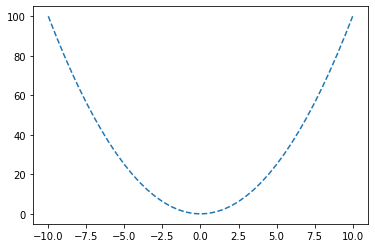

In [10]:
plt.plot(x,y,'--')
plt.show()

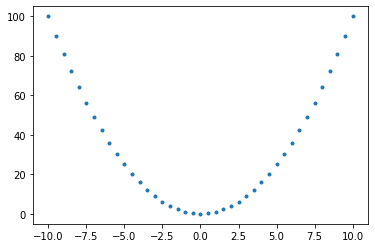

In [11]:
plt.plot(x,y,'.')
plt.show()

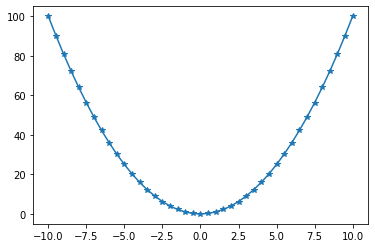

In [12]:
plt.plot(x,y,'-*')
plt.show()

Note that in this last one I combined two different things, a marker and a line style, and I got both a line connecting the points and a star at each point.

To change the color of the line, note this part of the documentation:

    character        color
    =============    ===============================
    ``'b'``          blue
    ``'g'``          green
    ``'r'``          red
    ``'c'``          cyan
    ``'m'``          magenta
    ``'y'``          yellow
    ``'k'``          black
    ``'w'``          white
    =============    ===============================

To modify the color, just add the appropriate character to the string which is specifying the line/point style.  For example:

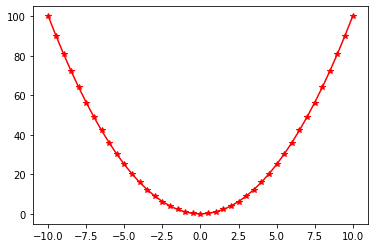

In [13]:
plt.plot(x,y,'r-*')
plt.show()

That's all good, but how do you plot multiple things on the same graph?  There are a few ways to do it, but the simplest is to issue the plot command twice, once with each data set. Be sure to issue the plt.show() function after both plt.plot() function.

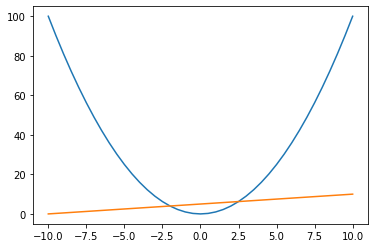

In [14]:
y2 = 0.5 * x + 5 #set our second plot, y2, as y = 0.5x +5
plt.plot(x,y)
plt.plot(x,y2)
plt.show()

You could modify the line style and color for each of our plots individually.  If you don't, matplotlib is at least smart enough to know to give them different colors.

While nice, these are not complete plots.  There is no x-label, no y-label, no title, and no legend to tell you which lines is what.  To fix that, we can use the plt.xlabel, plt.ylabel, plt.title, and plt.legend functions.  For the xlabel, ylabel, and legend functions, the argument is just a string.  For the legend, you need to make an array of strings, with one input for each line you are drawing.  For example, see below:

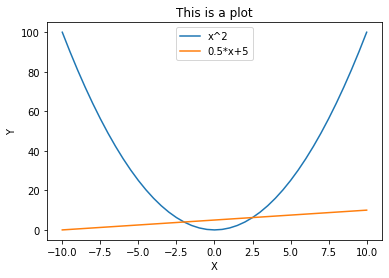

In [15]:
y2 = 0.5 * x + 5 #set our second plot, y2, as y = 0.5x +5
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['x^2','0.5*x+5'])
plt.title('This is a plot')
plt.show()

### Activity

Write a program below that reads the following two files:

https://raw.githubusercontent.com/WereszczynskiClasses/data/main/sine.dat

and

https://raw.githubusercontent.com/WereszczynskiClasses/data/main/cosine.dat

As the names suggest, the first is a sine function and the second a cosine function.  

After reading the contents of both files into arrays, plot both of them on the same graph.  Change the line colors and/or styles to something that makes them distinctive from one another, and add and x-axis label, a y-axis label, and plot title.  Also add a legend that properly describes  each line.

In [16]:
%reset -f

In [18]:
import numpy as np
import matplotlib.pylab as plt

There are no variables to import in this code

Import both files from the web, and save their x and y contents to data_sine and data_cosine.  Plot both.

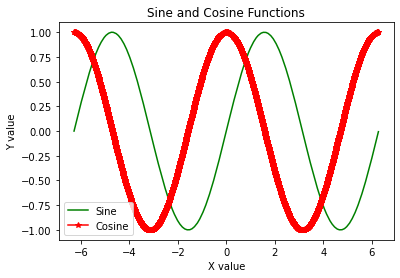

In [19]:
data_sine=np.genfromtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/sine.dat')
data_cosine=np.genfromtxt('https://raw.githubusercontent.com/WereszczynskiClasses/data/main/cosine.dat')
plt.plot(data_sine[:,0],data_sine[:,1],'g')
plt.plot(data_cosine[:,0],data_cosine[:,1],'r-*')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.title('Sine and Cosine Functions')
plt.legend(['Sine','Cosine'])
plt.show()

##Scatter Plot

Oftentimes you'll want to plot one set of data vs. another.  For this, a scatter plot is typically appropriate. In a scatter plot you plot the value of one variable against another.  Although you can do this with the plt.plot function, the plt.scatter command is easier.  It follows a similar syntax, but here you don't have to specify that each of your points should be specified by a dot, and it will also allow more advanced functions such as giving each point a different color or size (if you have time and/or are curious, here is a nice notebook you can open with demos: [Scatter plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)).

**Excercise** Using the arrays you imported above, make a scatter plot of sine values (x-axis) and cosine values (y-axis) below.  Note the command for scatter is plt.scatter(X1,X2) where X1 and X2 are the data points you are plotting in the scatter plot.

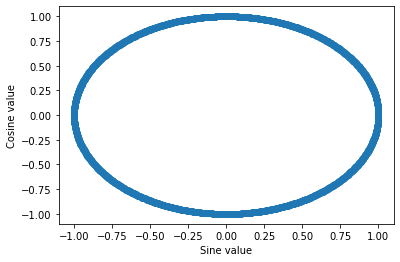

In [20]:
plt.scatter(data_sine[:,1],data_cosine[:,1])
plt.xlabel('Sine value')
plt.ylabel('Cosine value')
plt.show()

## Plotting 3D Data (If you have time)

(Largely adapted from this nice resource: https://github.com/jakevdp/PythonDataScienceHandbook)

Oftentimes in physics we have three dimensional data that we want to represent.  While 3D plots are possible, they are usually difficult to interpret.  A better solution is typically to display three-dimensional data in two dimensions using contours or color-coded regions. There are three Matplotlib functions that can be helpful for this task: plt.contour for contour plots, plt.contourf for filled contour plots, and plt.imshow for showing images. This section looks at several examples of using these. We'll start by demonstrating a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:


In [21]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the plt.contour function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. Perhaps the most straightforward way to prepare such data is to use the np.meshgrid function, which builds two-dimensional grids from one-dimensional arrays:

In [22]:
x = np.linspace(0, 5, 200)
y = np.linspace(0, 5, 200)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Now let's look at this with a standard line-only contour plot:

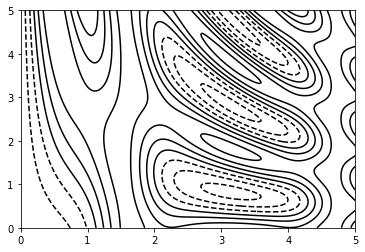

In [23]:
plt.contour(X, Y, Z, colors='black')
plt.show()

Notice that by default when a single color is used, negative values are represented by dashed lines, and positive values by solid lines. Alternatively, the lines can be color-coded by specifying a colormap with the cmap argument. Here, we'll also specify that we want more lines to be drawn—20 equally spaced intervals within the data range:

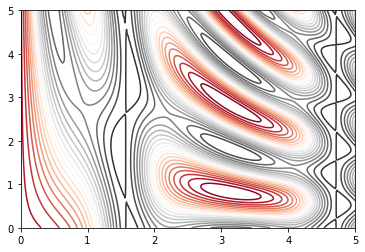

In [24]:
plt.contour(X, Y, Z, 20, cmap='RdGy')
plt.show()

Here we chose the RdGy (short for Red-Gray) colormap, which is a good choice for centered data. Matplotlib has a wide range of colormaps available, which you can easily browse here: [Color Maps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

Our plot is looking nicer, but the spaces between the lines may be a bit distracting. We can change this by switching to a filled contour plot using the plt.contourf() function (notice the f at the end), which uses largely the same syntax as plt.contour().
Additionally, we'll add a plt.colorbar() command, which automatically creates an additional axis with labeled color information for the plot:

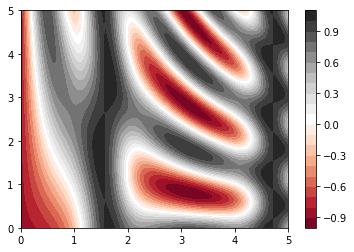

In [25]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.show()

The colorbar makes it clear that the black regions are "peaks," while the red regions are "valleys."

One potential issue with this plot is that it is a bit "splotchy." That is, the color steps are discrete rather than continuous, which is not always what is desired. This could be remedied by setting the number of contours to a very high number, but this results in a rather inefficient plot: Matplotlib must render a new polygon for each step in the level. A better way to handle this is to use the plt.imshow() function, which interprets a two-dimensional grid of data as an image.
The following code shows this:

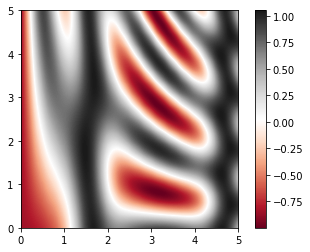

In [26]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.show()

There are a couple of potential gotchas with imshow(), however:

* plt.imshow() doesn't accept an x and y grid, so you must manually specify the extent [xmin, xmax, ymin, ymax] of the image on the plot.

* plt.imshow() by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.

Finally, it can sometimes be useful to combine contour plots and image plots. For example, here we'll use a partially transparent background image (with transparency set via the alpha parameter) and overplot contours with labels on the contours themselves (using the plt.clabel() function):


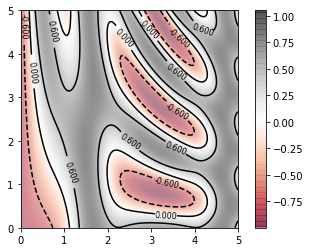

In [27]:
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar();


The combination of these three functions—plt.contour, plt.contourf, and plt.imshow—gives nearly limitless possibilities for displaying this sort of three-dimensional data within a two-dimensional plot. For more information on the options available in these functions, refer to their docstrings. If you are interested in three-dimensional visualizations of this type of data, see [Three Dimensional Plotting in Python](https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/04.12-Three-Dimensional-Plotting.ipynb)